In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
berrien_president = pd.read_csv('./berrien-president.txt')
berrien_straight_party = pd.read_csv('./berrien-straight-party.txt')

In [9]:
berrien_straight_party['sp_total'] = (
    berrien_straight_party['dem'] +
    berrien_straight_party['rep'] +
    berrien_straight_party['lib'] +
    berrien_straight_party['ust'] +
    berrien_straight_party['wcp'] +
    berrien_straight_party['grn'] +
    berrien_straight_party['nlp']
)

berrien_straight_party['percentage_republican'] = berrien_straight_party['rep'] / berrien_straight_party['sp_total']

In [14]:
berrien_president['total_votes'] = (
    berrien_president['biden'] +
    berrien_president['trump'] +
    berrien_president['jorgensen'] +
    berrien_president['blankenship'] +
    berrien_president['hawkins'] +
    berrien_president['de_la_fuente'] +
    berrien_president['wt']
)

berrien_president['trump_vote_percentage'] = berrien_president['trump'] / berrien_president['total_votes']

In [16]:
# Axes
straight_republican_percentage = berrien_straight_party['percentage_republican'].tolist()
trump_relative_performance = (berrien_president['trump_vote_percentage'] - berrien_straight_party['percentage_republican']).tolist()

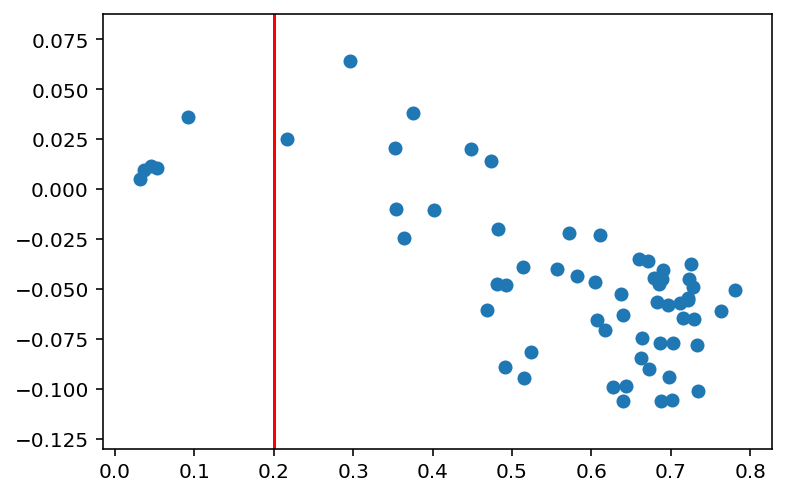

In [19]:
plt.scatter(
    straight_republican_percentage,
    trump_relative_performance
)

plt.axvline(x=0.2, color='red')

plt.show()